# Теория погрешностей и машинная арифметика

## Самоделкина Мария, БПМ 174

Вариант 19 (1.1.19, 1.8, 1.4.5, 1.7 , 1.6, 1.9.2)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Задача 1.1.19**

Дан ряд $\sum_{n=0}^{\infty}\cfrac{180}{n^2 + 20n + 99}$. Найти сумму ряда аналитически:

$S_N = \sum_{n=0}^{N}\cfrac{180}{n^2 + 20n + 99} = \sum_{n=0}^{N}\cfrac{180}{(n + 9)(n + 11)} = 180\sum_{n=0}^{N}\cfrac{1}{2}(\cfrac{1}{n + 9} - \cfrac{1}{n + 11}) = 90 (\cfrac{1}{9} + \cfrac{1}{10} - \cfrac{1}{N+10} - \cfrac{1}{N+11})$

$S = \lim_{N \rightarrow \infty} S_N = 19$

**Ответ:** $ S = \sum_{n=0}^{\infty}\cfrac{180}{n^2 + 20n + 99} = 19$

Вычислить значения частичных сумм ряда и найти величину погрешности при $N = 10, 10^2, 10^3, 10^4, 10^5$

Абсолютная погрешность $d_N = |S_N - S|$

In [0]:
def S(N):
    return sum(180 / (n**2 + 20*n + 99) for n in range(N+1))

x = []
height = []
print('Значение суммы ряда', 'Величина абсолютной погрешности', 'Количество верных цифр', sep='\t')
for i in range(1, 6):
    N = 10**i
    S_N = S(N)
    d_N = abs(S_N - 19)
    x.append(i)
    height.append(np.ceil(-np.log10(d_N)+1))
    print(S_N, d_N, height[-1], sep='\t\t')

Значение суммы ряда	Величина абсолютной погрешности	Количество верных цифр
10.214285714285714		8.785714285714286		1.0
17.37100737100736		1.6289926289926413		1.0
18.821870317595547		0.17812968240445315		2.0
18.982018880130962		0.017981119869038054		3.0
18.998200188979762		0.0017998110202377404		4.0


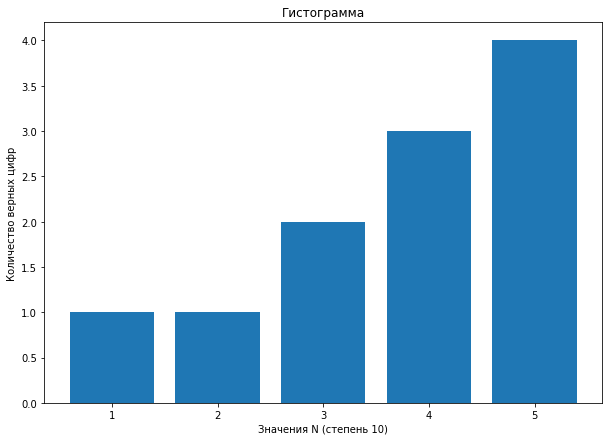

In [0]:
plt.figure(figsize=(10, 7))
plt.title('Гистограмма')
plt.ylabel('Количество верных цифр')
plt.xlabel('Значения N (степень 10)')
plt.bar(x, height)
plt.show()

**Задача 1.8**

Составить программу, моделирующую вычисления на ЭВМ с ограниченной разрядностью m.
Решить **задачу 1.1** для случая $N = 10000$, используя эту программу. Составить график зависимости погрешности от количества разрядов $m=4,5,…,8$.

In [0]:
def mantissa2bin(man, max_digits=23):
    result = ''
    for i in range(max_digits):
        if man < 0.5:
            result += '0'
        else:
            man -= 0.5
            result += '1'
        man *= 2.0
    return result   
def bin2mantissa(b):
    current = 0.5
    result = 0.0
    for digit in b:
        if digit == '1':
            result += current
        current /= 2.0
    return result 

In [0]:
def sum_converter(x, max_digits):
    m, p = np.frexp(180 / (x**2 + 20*x + 99))
    m = bin2mantissa(mantissa2bin(m, max_digits)) 
    return m * 2.0 ** p

In [0]:
def S(N, max_digits):
    return sum(sum_converter(n, max_digits) for n in range(N+1))

d = []
print('Разрядность мантиссы', 'Значение суммы ряда', 'Величина абсолютной погрешности', sep='\t')
for i in range(4, 9):
    res = S(10000, i)
    d.append(abs(res - 19))
    print(i, res, d[-1], sep='\t\t\t')

Разрядность мантиссы	Значение суммы ряда	Величина абсолютной погрешности
4			18.247143983840942			0.7528560161590576
5			18.66738110780716			0.3326188921928406
6			18.83179008960724			0.16820991039276123
7			18.89956071972847			0.10043928027153015
8			18.940522126853466			0.059477873146533966


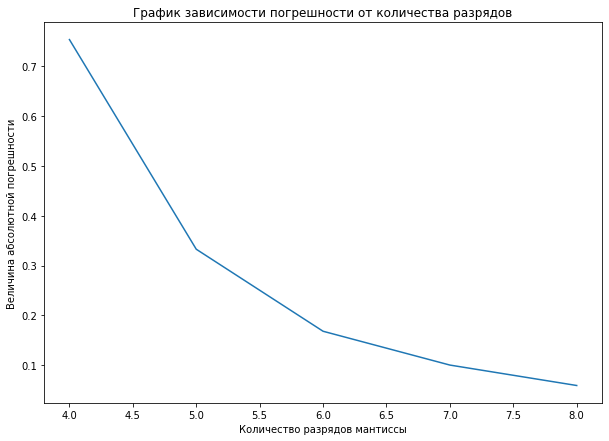

In [0]:
plt.figure(figsize=(10, 7))
plt.title('График зависимости погрешности от количества разрядов')
plt.ylabel('Величина абсолютной погрешности')
plt.xlabel('Количество разрядов мантиссы')
plt.plot(range(4, 9), d)
plt.show()

Далее вариант на случай, если в задании имелась в виду разрядность числа, а не мантиссы.

In [0]:
def S(N, decimals):
    x = np.around(np.array([180 / (n**2 + 20*n + 99) for n in range(N+1)]), decimals=decimals)
    return np.around(x.sum(), decimals=decimals)

d = []
print('Разрядность числа', 'Значение суммы ряда', 'Величина абсолютной погрешности', sep='\t')
for i in range(4, 9):
    s = S(10**4, i)
    d.append(abs(s - 19))
    print(i, s, d[-1], sep='\t\t')

Разрядность числа	Значение суммы ряда	Величина абсолютной погрешности
4		18.9184		0.08160000000000167
5		18.97434		0.025659999999998462
6		18.981974		0.018025999999998987
7		18.9820175		0.01798249999999868
8		18.98201884		0.017981160000001495


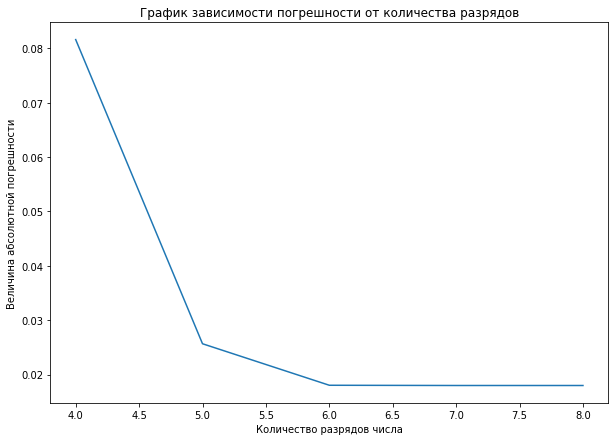

In [0]:
plt.figure(figsize=(10, 7))
plt.title('График зависимости погрешности от количества разрядов')
plt.ylabel('Величина абсолютной погрешности')
plt.xlabel('Количество разрядов числа')
plt.plot(range(4, 9), d)
plt.show()

**Задача 1.4.5**

Найти ранг заданной матрицы $A$. Затем внести погрешность в $0.1\%$ 

а) в элемент $a_{11}$; 

b) во все элементы матрицы и снова найти ранг. 

Объяснить полученные результаты.

In [0]:
A = [[1.9, 9, 1.6, 0.1],
[11.3, 23, 6.8, -3.7],
[0.5, 10, 1.1, 1.1],
[0.9, -11, -0.6, -2.1]]

In [0]:
np.linalg.matrix_rank(A)

2

In [0]:
A[0][0] = A[0][0] + A[0][0] / 1000
np.linalg.matrix_rank(A)

3

In [0]:
for i in range(4):
    for j in range(4):
        if i or j:
            A[i][j] = A[i][j] + A[i][j] / 1000
np.linalg.matrix_rank(A)

2

После внесения погрешности в первый элемент один из миноров стал отличен от 0 и ранг изменился.

После внесения одинаково процентных погрешностей ранг матрицы снова стал 2, это эквивалентно умножению элементов матрицы на одно и то же число (ранг матрицы остается тот же).

**Задача 1.6**

Найти значения машинного нуля, машинной бесконечности, машинного
эпсилон


In [0]:
def inf(n):
    try:
        return 2.0 ** n
    except OverflowError:
        return float('inf')

def zero(n):
    return 2.0 ** -(n)

def res(n):
    return 1.0 + 2.0 ** (-n)

In [0]:
inf(1020), inf(1023), inf(1024)

(1.1235582092889474e+307, 8.98846567431158e+307, inf)

Машинная бесконечность $X_\infty \approx 10^{307}$

In [0]:
zero(1050), zero(1074), zero(1075)

(8.289046e-317, 5e-324, 0.0)

Машинный ноль $X_0 \approx 10^{-324}$

In [0]:
res(50), res(52), res(53)

(1.0000000000000009, 1.0000000000000002, 1.0)

In [0]:
zero(52)

2.220446049250313e-16

Машинное эпсилон $X_\epsilon \approx 10^{-16}$

**Задача 1.7**

Вычислить значения машинного нуля, машинной бесконечности, машинного эпсилон в режимах одинарной и двойной точности на алгоритмическом языке. Сравнить результаты с результатами задачи 1.6.

УКАЗАНИЕ: при использовании языка Python, вещественные числа ординарной точности можно получить используя библиотеку NumPy, напр. np.float32(1) и т.д.

In [0]:
def inf32(n):
    return np.float32(2 ** n)

def zero32(n):
    return np.float32(2 ** -(n))

def res32(n):
    return np.float32(1 + 2 ** (-n))

In [0]:
inf32(100), inf32(127), inf32(128)

(1.2676506e+30, 1.7014118e+38, inf)

Машинная бесконечность $X_\infty \approx 10^{38}$


In [0]:
zero32(100), zero32(149), zero32(150)

(7.888609e-31, 1e-45, 0.0)

Машинный ноль $X_0 \approx 10^{-45}$

In [0]:
res32(20), res32(23), res32(24)

(1.000001, 1.0000001, 1.0)

In [0]:
zero32(23)

1.1920929e-07

Машинное эпсион $X_\epsilon \approx 10^{-7}$

In [0]:
def inf64(n):
    return np.float64(2) ** n

def zero64(n):
    return np.float64(2 ** -(n))

def res64(n):
    return np.float64(1 + 2 ** (-n))

In [0]:
inf64(1020), inf64(1023), inf64(1024)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


(1.1235582092889474e+307, 8.98846567431158e+307, inf)

Машинная бесконечность $X_\infty \approx 10^{307}$

In [0]:
zero64(1070), zero64(1074), zero64(1075)

(8e-323, 5e-324, 0.0)

Машинный ноль $X_0 \approx 10^{-324}$

In [0]:
res64(50), res64(52), res64(53)

(1.0000000000000009, 1.0000000000000002, 1.0)

In [0]:
zero64(52)

2.220446049250313e-16

Машинное эпсилон $X_\epsilon \approx 10^{-16}$

Сравнив результаты с результатами предыдущей задачи можно сказать, что в Python по умолчанию используется тип float64.

**Задача 1.9.2**

Для матрицы $A$ решить вопрос о существовании обратной матрицы в следующих случаях:

1) элементы матрицы заданы точно;

2) элементы матрицы заданы приближенно с относительной погрешностью a) $δ =α\%$ и b) $δ = β\%$. 

Найти относительную погрешность результата.

In [0]:
A = np.array([[30, 34, 19],
[31.4, 35.4, 20],
[24, 28, 13]])

alpha = 0.05
beta = 0.1

In [0]:
np.linalg.det(A)

9.600000000000176

Обратная матрица существует (определитель отличен от нуля).

In [0]:
for eps in [alpha, beta]:
    dets = []
    for i in range(2**9):
        a = list(map(int, f'{i:09b}')) # перебираем все возможние варианты выбора элементов матрицы
        A1 = A.copy()
        A1 = A1.reshape(-1, 1)
        for j in range(9):
            if a[j]:
                A1[j] = A1[j] * (1 + eps / 100)
            else:
                A1[j] = A1[j] * (1 - eps / 100)
        dets.append(np.linalg.det(A1.reshape(3, 3)))

    print('m:', min(dets), 'M:', max(dets))   

m: 3.6042036012009144 M: 15.589803598798975
m: -2.397585590399123 M: 21.573614390399435


При относительной погрешности $0.05\%$ обратная матрица существует, поскольку точка 0 не принадлежит отрезку $[m, M]$.

При относительной погрешности $0.1\%$ нельзя ничего сказать о существовании обратной матрицы, поскольку точка 0 принадлежит отрезку $[m, M]$. Возмущение элементов оказалось слишком большим.

Чтобы найти относительную погрешность вычисления определителя:

* относительная погрешность суммы: $\delta(a^* \pm b^*) \le \delta_{max}$ 
* относительная погрешность произведения: $\delta(a^* b^*) \le \delta(a^*) + \delta(b^*)$

Соответственно, погрешность определителя: $\delta(|A|) \le \delta(a^* (b^* c^* - d^* e^*)) \le \delta(a^*) + \delta(b^*) + \delta(c^*) = 3\delta(a^*)$

При относительной погрешности $0.05\%$ относительная погрешность вычисления определителя равна $0.15\%$.

При относительной погрешности $0.1\%$ относительная погрешность вычисления определителя равна $0.3\%$.